In [1]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
credits_df = pd.read_csv('tmdb_5000_credits.csv')

movies_df = pd.read_csv('tmdb_5000_movies.csv')

In [4]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
# merging the two files

movies_df = pd.merge(movies_df, credits_df, left_on ='id', right_on='movie_id', how='left', suffixes=('', '_y'))

movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'crew'],
      dtype='object')

In [7]:
# First step is to clean the data and see which are the redundant or unnecessary cols

del_col_list = ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 
                'overview', 'production_companies', 'original_title', 'title_y']

movies_df = movies_df.drop(del_col_list, axis=1)
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
#  dropping the duplicates from the dataset.
print(movies_df.shape)
movies_df = movies_df.drop_duplicates(keep='first')
print(movies_df.shape)

(4803, 15)
(4803, 15)


In [11]:
# replacing all the zeros from revenue and budget cols.

cols = ['budget', 'revenue']
movies_df[cols] = movies_df[cols].replace(0, np.nan)

# dropping all the rows with na in the columns mentioned above in the list.
movies_df.dropna(subset=cols, inplace=True)
movies_df.shape

(3229, 15)

In [12]:
# Changing the release_date column to DateTime column

movies_df.release_date = pd.to_datetime(movies_df['release_date'])
# To answer the last question, we'll have to extract the release year from every release date
movies_df['release_year'] = movies_df['release_date'].dt.year
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew,release_year
0,237000000.0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2.787965e+09,162.0,"['English', 'Español']",Avatar,7.2,11800,19995,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009
1,300000000.0,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,9.610000e+08,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,285,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007
2,245000000.0,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,8.806746e+08,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,206647,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015
3,250000000.0,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1.084939e+09,165.0,['English'],The Dark Knight Rises,7.6,9106,49026,"['Christian Bale', 'Michael Caine', 'Gary Oldm...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012
4,260000000.0,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,2.841391e+08,132.0,['English'],John Carter,6.1,2124,49529,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012


In [13]:
# Changing the data type of the below mentioned columns and 
change_cols=['budget', 'revenue']
#changing data type
movies_df[change_cols]=movies_df[change_cols].applymap(np.int64)
movies_df.dtypes

budget                           int64
genres                          object
id                               int64
popularity                     float64
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
title                           object
vote_average                   float64
vote_count                       int64
movie_id                         int64
cast                            object
crew                            object
release_year                     int64
dtype: object

In [14]:
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,19995,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,285,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,206647,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,49026,"['Christian Bale', 'Michael Caine', 'Gary Oldm...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,49529,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012


In [15]:
# Answer to question #1.
# To find out the most expensive movies, we need to look at the budget set for them which is an indicator of expense.

expensive_movies_df = movies_df.sort_values(by ='budget', ascending=False).head()
expensive_movies_df

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew,release_year
17,380000000,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,1045713802,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,6.4,4948,1865,"['Johnny Depp', 'Penélope Cruz', 'Ian McShane'...","[{""credit_id"": ""566b4f54c3a3683f56005151"", ""de...",2011
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,285,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,99861,"['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...",2015
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,5.4,1400,1452,"['Brandon Routh', 'Kevin Spacey', 'Kate Boswor...","[{""credit_id"": ""553bef6a9251416874003c8f"", ""de...",2006
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,49529,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012


In [16]:
def find_min_max_in(col):
    """
    The function takes in a column and returns the top 5
    and bottom 5 movies dataframe in that column.
    
    args:
        col: string - column name
    return:
        info_df: dataframe - final 5 movies dataframe
    """
    
    top = movies_df[col].idxmax()
    top_df = pd.DataFrame(movies_df.loc[top])
    
    bottom = movies_df[col].idxmin()
    bottom_df = pd.DataFrame(movies_df.loc[bottom])
    
    info_df = pd.concat([top_df, bottom_df], axis=1)
    return info_df

find_min_max_in('budget')

,17,4238
budget,380000000,1
genres,"['Adventure', 'Action', 'Fantasy']","['Drama', 'Comedy']"
id,1865,3082
popularity,135.414,28.2765
production_countries,['United States of America'],['United States of America']
release_date,2011-05-14 00:00:00,1936-02-05 00:00:00
revenue,1045713802,8500000
runtime,136,87
spoken_languages,"['English', 'Español']",['English']
title,Pirates of the Caribbean: On Stranger Tides,Modern Times


In [22]:
# to find the most profitable movies, we need to find who made the most 
# amount after deducting the budget from the revenue generated.

movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
cols = ['budget',
         'profit',
         'revenue',
         'genres',
         'id',
         'popularity',
         'production_countries',
        'release_date',
        'release_year',
         'runtime',
         'spoken_languages',
         'title',
        'cast',
         'vote_average',
         'vote_count']
movies_df = movies_df[cols]
movies_df.sort_values(by = ['profit'], ascending=False).head()

,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,cast,vote_average,vote_count
0,237000000,2550965087,2787965087,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2009,162.0,"['English', 'Español']",Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",7.2,11800
25,200000000,1645034188,1845034188,"['Drama', 'Romance', 'Thriller']",597,100.025899,['United States of America'],1997-11-18,1997,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",Titanic,"['Kate Winslet', 'Leonardo DiCaprio', 'Frances...",7.5,7562
28,150000000,1363528810,1513528810,"['Action', 'Adventure', 'Science Fiction', 'Th...",135397,418.708552,['United States of America'],2015-06-09,2015,124.0,['English'],Jurassic World,"['Chris Pratt', 'Bryce Dallas Howard', 'Irrfan...",6.5,8662
44,190000000,1316249360,1506249360,['Action'],168259,102.322217,"['Japan', 'United States of America']",2015-04-01,2015,137.0,['English'],Furious 7,"['Vin Diesel', 'Paul Walker', 'Dwayne Johnson'...",7.3,4176
16,220000000,1299557910,1519557910,"['Science Fiction', 'Action', 'Adventure']",24428,144.448633,['United States of America'],2012-04-25,2012,143.0,['English'],The Avengers,"['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...",7.4,11776


In [23]:
# to find the most talked about movies, we can sort the dataframe on the popularity column
popular_movies_df = movies_df.sort_values(by ='popularity', ascending=False).head()
popular_movies_df.head()

,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,cast,vote_average,vote_count
546,74000000,1082730962,1156730962,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,875.581305,['United States of America'],2015-06-17,2015,91.0,['English'],Minions,"['Sandra Bullock', 'Jon Hamm', 'Michael Keaton...",6.4,4571
95,165000000,510120017,675120017,"['Adventure', 'Drama', 'Science Fiction']",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,2014,169.0,['English'],Interstellar,"['Matthew McConaughey', 'Jessica Chastain', 'A...",8.1,10867
788,58000000,725112979,783112979,"['Action', 'Adventure', 'Comedy']",293660,514.569956,['United States of America'],2016-02-09,2016,108.0,['English'],Deadpool,"['Ryan Reynolds', 'Morena Baccarin', 'Ed Skrei...",7.4,10995
94,170000000,603328629,773328629,"['Action', 'Science Fiction', 'Adventure']",118340,481.098624,"['United Kingdom', 'United States of America']",2014-07-30,2014,121.0,['English'],Guardians of the Galaxy,"['Chris Pratt', 'Zoe Saldana', 'Dave Bautista'...",7.9,9742
127,150000000,228858340,378858340,"['Action', 'Adventure', 'Science Fiction', 'Th...",76341,434.278564,"['Australia', 'United States of America']",2015-05-13,2015,120.0,['English'],Mad Max: Fury Road,"['Tom Hardy', 'Charlize Theron', 'Nicholas Hou...",7.2,9427


In [25]:
# in terms of runtime
# Average runtime of movies
movies_df['runtime'].mean()
# comparison
find_min_max_in('runtime')

,2384,3626
budget,18000000,5000000
profit,-17128721,-925977
revenue,871279,4074023
genres,"['Crime', 'Drama', 'Thriller', 'History']",['Documentary']
id,43434,78394
popularity,1.13838,4.49837
production_countries,"['France', 'Germany']","['France', 'United Kingdom']"
release_date,2010-05-19 00:00:00,2010-05-14 00:00:00
release_year,2010,2010
runtime,338,41


In [26]:
# movies rated above 7 

movies_df[movies_df['vote_average'] >= 7.0]

,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,cast,vote_average,vote_count
0,237000000,2550965087,2787965087,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2009,162.0,"['English', 'Español']",Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",7.2,11800
3,250000000,834939099,1084939099,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,2012,165.0,['English'],The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",7.6,9106
6,260000000,331794936,591794936,"['Animation', 'Family']",38757,48.681969,['United States of America'],2010-11-24,2010,100.0,['English'],Tangled,"['Zachary Levi', 'Mandy Moore', 'Donna Murphy'...",7.4,3330
7,280000000,1125403694,1405403694,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,2015,141.0,['English'],Avengers: Age of Ultron,"['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...",7.3,6767
8,250000000,683959197,933959197,"['Adventure', 'Fantasy', 'Family']",767,98.885637,"['United Kingdom', 'United States of America']",2009-07-07,2009,153.0,['English'],Harry Potter and the Half-Blood Prince,"['Daniel Radcliffe', 'Rupert Grint', 'Emma Wat...",7.4,5293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,160000,6546368,6706368,"['Documentary', 'History']",1779,3.284903,['United States of America'],1989-09-01,1989,91.0,['English'],Roger & Me,"['Michael Moore', 'Roger B. Smith', 'Rhonda Br...",7.4,90
4724,10000,6990000,7000000,"['Drama', 'Fantasy', 'Horror', 'Science Fiction']",985,20.399578,['United States of America'],1977-03-19,1977,89.0,['English'],Eraserhead,"['Jack Nance', 'Charlotte Stewart', 'Allen Jos...",7.5,485
4738,60000,3161152,3221152,"['Mystery', 'Drama', 'Thriller']",473,27.788067,['United States of America'],1998-07-10,1998,84.0,['English'],Pi,"['Sean Gullette', 'Mark Margolis', 'Ben Shenkm...",7.1,586
4773,27000,3124130,3151130,['Comedy'],2292,19.748658,['United States of America'],1994-09-13,1994,92.0,['English'],Clerks,"[""Brian O'Halloran"", 'Jeff Anderson', 'Jason M...",7.4,755


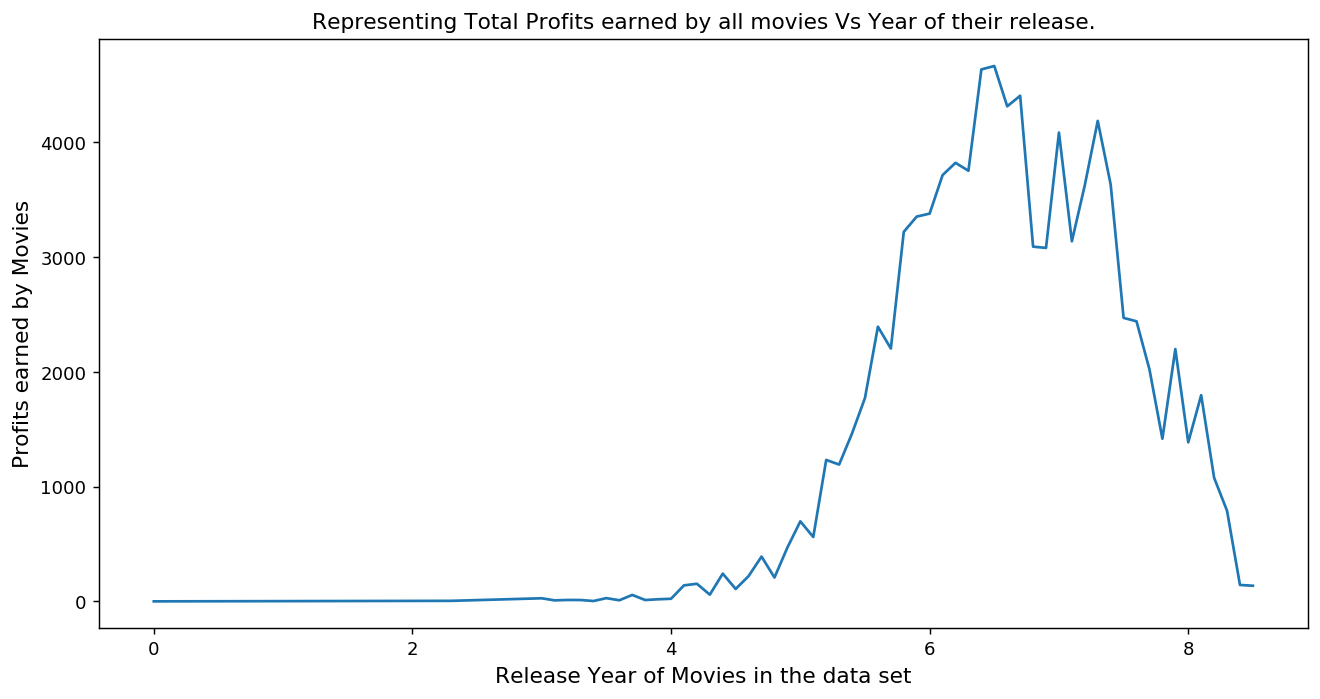

In [37]:
profits_year = movies_df.groupby('vote_average')['popularity'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

In [28]:
# Most profitable year from the given dataset.

profits_year.idxmax()

2014